# ICSR '19 - Gkortzis et al. - Data Analysis

This notebook performs the following analyses reported in the study:

1. [Prepare dataset](#prepare)
2. [RQ1 - Descriptive statistics](#descriptive)
3. [RQ1 - Boxplots](#boxplots)
4. [RQ1 - Grouping analysis](#grouping)
5. [RQ2 - Scatterplots](#scatterplots)
5. [RQ2 - Boxplots](#boxplots2)
7. [RQ2 - Correlation](#correlation)

<a id="prepare"></a>
## Prepare dataset

In [12]:
import pandas as pd

def load_dataset(csv_file):
    return pd.read_csv(csv_file)

def prepare_dataset(df):
    # Remove project with no external classes or user classes
    df = df[df['#d_classes'] > 0]
    df = df[df['#u_sloc'] > 1000]
    
    # Calculate derived variables
    df['#uv_p1'] = df['#uv_p1_r1'] + df['#uv_p1_r2'] + df['#uv_p1_r3'] + df['#uv_p1_r4']
    df['#dv_p1'] = df['#dv_p1_r1'] + df['#dv_p1_r2'] + df['#dv_p1_r3'] + df['#dv_p1_r4']
    df['#uv_p2'] = df['#uv_p2_r1'] + df['#uv_p2_r2'] + df['#uv_p2_r3'] + df['#uv_p2_r4']
    df['#dv_p2'] = df['#dv_p2_r1'] + df['#dv_p2_r2'] + df['#dv_p2_r3'] + df['#dv_p2_r4']
    df['#uv'] = df['#uv_p1'] + df['#uv_p2']
    df['#dv'] = df['#dv_p1'] + df['#dv_p2']
    df['#uv_sloc'] = df['#uv'] / (df['#d_sloc']+df['#u_sloc'])
    df['#dv_sloc'] = df['#dv'] / (df['#d_sloc']+df['#u_sloc'])

    return df

projects_dataset = '../dataset_final.csv'
study_vars = ['#u_classes', '#d_classes', '#u_sloc', '#d_sloc', '#uv', '#dv', '#uv_classes', '#dv_classes', '#uv_sloc', '#dv_sloc']

<a id="descriptive"></a>
## RQ1 - Descriptive statistics

In [15]:
df = load_dataset(projects_dataset)
df = prepare_dataset(df)

# Add reuse ratio
df = df[study_vars]
df.describe()

,#u_classes,#d_classes,#u_sloc,#d_sloc,#uv,#dv,#uv_classes,#dv_classes,#uv_sloc,#dv_sloc
count,301.000000,301.000000,301.000000,3.010000e+02,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,959.983389,3597.990033,26840.518272,1.172091e+05,55.481728,171.906977,25.980066,96.810631,0.000535,0.001122
std,3640.975425,7835.849727,88054.296011,1.923768e+05,222.223830,350.719001,88.136558,211.139655,0.001524,0.001851
min,3.000000,4.000000,1002.000000,9.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,503.000000,1957.000000,1.718900e+04,1.000000,6.000000,1.000000,5.000000,0.000006,0.000236
50%,132.000000,1715.000000,3710.000000,5.967900e+04,5.000000,48.000000,4.000000,28.000000,0.000063,0.000893
75%,308.000000,4417.000000,10389.000000,1.484820e+05,20.000000,185.000000,11.000000,104.000000,0.000359,0.001611
max,36587.000000,118110.000000,798308.000000,2.525867e+06,2230.000000,4175.000000,801.000000,2660.000000,0.015892,0.029015


## RQ1 - Descriptive statistics - Median

In [17]:
df.median()

#u_classes       132.000000
#d_classes      1715.000000
#u_sloc         3710.000000
#d_sloc        59679.000000
#uv                5.000000
#dv               48.000000
#uv_classes        4.000000
#dv_classes       28.000000
#uv_sloc           0.000063
#dv_sloc           0.000893
dtype: float64

<a id="boxplots"></a>
## RQ1 - Boxplots

/home/agkortzis/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


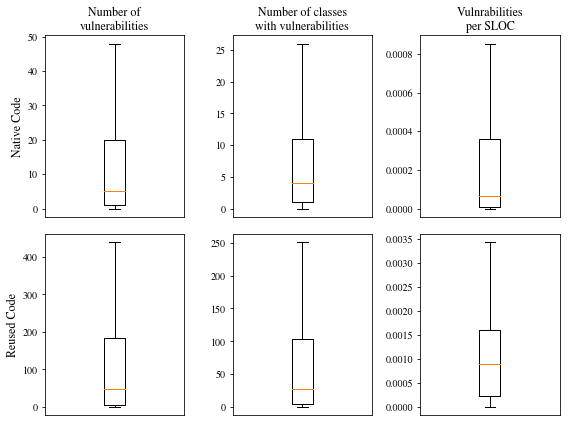

In [5]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


df = load_dataset(projects_dataset)
df = prepare_dataset(df)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 6), tight_layout = {'pad': 1})
bp_vars = ['#uv', '#uv_classes', '#uv_sloc', '#dv', '#dv_classes', '#dv_sloc']
cols = ['Number of\nvulnerabilities', 'Number of classes\nwith vulnerabilities', 'Vulnrabilities\nper SLOC']
rows = ['Native Code', 'Reused Code']

# Plot boxes
for r in range(len(rows)):
    for c in range(len(cols)):
        bxp_df = df[bp_vars[r*len(cols) + c]]
        axs[r,c].boxplot(bxp_df, showfliers=False)
        axs[r,c].set_xticks([])

# Set titles
for ax, col in zip(axs[0], cols):
    ax.set_title(col)

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90, size='large')


fig.subplots_adjust(hspace=0.1, wspace=0.5)

plt.savefig("../../paper/figs/boxplots.pdf")

plt.show()

<a id="grouping"></a>
## RQ1 - Grouping analysis

In [6]:
import numpy as np
from scipy.stats import ttest_ind

def splitby_and_test(df, sort_var, test_var):    
    df.sort_values([sort_var], ascending=[True])
    dfs = np.array_split(df, 2)
    
    t = ttest_ind(dfs[0][test_var],dfs[1][test_var])
    print(f'Comparison of {test_var} for data sorted by {sort_var}')
    print(f'\tStatistic={t[0]:.2f} (p={t[1]:.2f})')


df = load_dataset(projects_dataset)
df = prepare_dataset(df)

splitby_and_test(df, '#u_sloc', '#uv')
splitby_and_test(df, '#u_sloc', '#dv')
splitby_and_test(df, '#d_sloc', '#uv')
splitby_and_test(df, '#d_sloc', '#dv')

Comparison of #uv for data sorted by #u_sloc
	Statistic=-3.87 (p=0.00)
Comparison of #dv for data sorted by #u_sloc
	Statistic=-2.26 (p=0.02)
Comparison of #uv for data sorted by #d_sloc
	Statistic=-3.87 (p=0.00)
Comparison of #dv for data sorted by #d_sloc
	Statistic=-2.26 (p=0.02)


<a id="scatterplots"></a>
## RQ2 - Scatterplots

/home/agkortzis/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


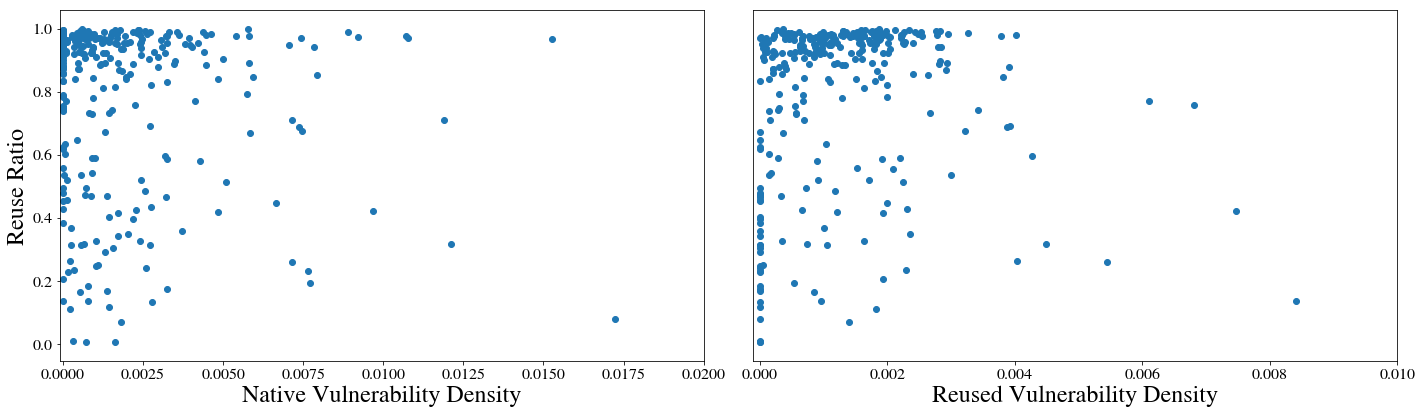

In [7]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

df['reuse_ratio'] = df['#d_sloc'] / (df['#d_sloc']+df['#u_sloc'])
df['uv_ratio'] = df['#uv'] / df['#u_sloc']
df['dv_ratio'] = df['#dv'] / df['#d_sloc']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), tight_layout = {'pad': 1})
label_size = 24

axs[0].scatter(df['uv_ratio'], df['reuse_ratio'],cmap='bwr')
axs[0].set_xlim([-0.0001,0.02])
axs[0].set_xlabel("Native Vulnerability Density", fontsize=label_size)
axs[0].set_ylabel('Reuse Ratio', rotation=90, fontsize=label_size)

axs[1].scatter(df['dv_ratio'], df['reuse_ratio'],cmap='bwr')
axs[1].set_xlim([-0.0001,0.01])
axs[1].set_xlabel("Reused Vulnerability Density", fontsize=label_size)
axs[1].set_yticks([])

fig.subplots_adjust(wspace=0.1)
plt.savefig("../../paper/figs/scatter_plots.pdf")
plt.show()


<a id="boxplots2"></a>
## RQ2 - Boxplots

/home/agkortzis/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


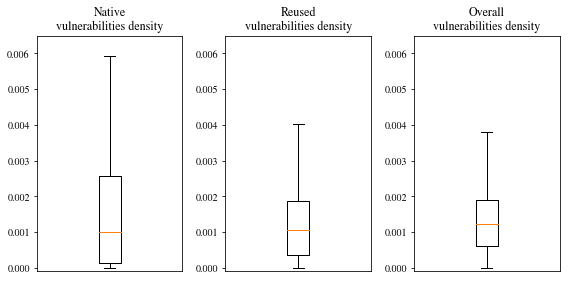

In [8]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


df = load_dataset(projects_dataset)
df = prepare_dataset(df)

df['reuse_ratio'] = df['#d_sloc'] / (df['#d_sloc']+df['#u_sloc'])
df['uv_ratio'] = df['#uv'] / df['#u_sloc']
df['dv_ratio'] = df['#dv'] / df['#d_sloc']
df['#v_sloc'] = (df['#uv'] + df['#dv']) / (df['#d_sloc']+df['#u_sloc'])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 4), tight_layout = {'pad': 1})
bp_vars = ['uv_ratio', 'dv_ratio', '#v_sloc'] #'reuse_ratio'
labels = ['Native\nvulnerabilities density', 'Reused\nvulnerabilities density', 'Overall\nvulnerabilities density'] #'Reuse ratio', 

# Plot boxes
for i in range(len(labels)):
    bxp_df = df[bp_vars[i]]
    axs[i].boxplot(bxp_df, showfliers=False)
    axs[i].set_xticks([])
    axs[i].set_ylim([-0.0001,0.0065])
    axs[i].set_title(labels[i])

fig.subplots_adjust(hspace=0.1, wspace=0.5)

plt.savefig("../../paper/figs/boxplots2.pdf")

plt.show()

<a id="correlation"></a>
## RQ2 - Correlation

In [9]:
from scipy.stats import pearsonr

df = load_dataset(projects_dataset)
df = prepare_dataset(df)

df['reuse_ratio'] = df['#d_sloc'] / (df['#d_sloc']+df['#u_sloc'])
df['#v_sloc'] = (df['#uv'] + df['#dv']) / (df['#d_sloc']+df['#u_sloc'])

df.sort_values(['reuse_ratio'], ascending=[True])
corr = pearsonr(df['reuse_ratio'],df['#v_sloc'])
print(f"Pearson correlation coefficient")
print(f"\tCoefficient: {corr[0]:.3f} (p-value={corr[1]:.5f})")

print("native vulns :: {}".format(sum(df['#uv'])))
print("reused vulns :: {}".format(sum(df['#dv'])))

Pearson correlation coefficient
	Coefficient: -0.176 (p-value=0.00218)
native vulns :: 16700
reused vulns :: 51744
